In [17]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
# load dataset
bank =  pd.read_csv("/content/bank-full.csv",sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank.shape

(45211, 17)

In [7]:
# removing NA values in dataset
bank = bank.dropna()
bank.shape

(45211, 17)

In [12]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
# select columns
columns=['age','balance','duration','campaign','y']
bank_sel = bank[columns]
bank_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.1+ MB


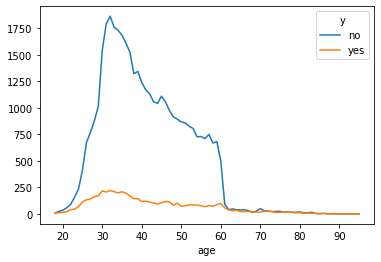

In [22]:
pd.crosstab(bank_sel.age,bank_sel.y).plot(kind="line") 
# age group of 20-60 shows more rejection as compared to age of 60-90

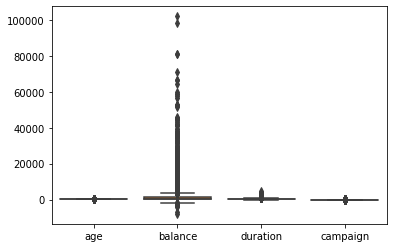

In [23]:
sns.boxplot(data=bank_sel,orient="v")

In [26]:
bank_sel['outcome']=bank_sel.y.map({'no':0,'yes':1})
bank_sel.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,balance,duration,campaign,y,outcome
0,58,2143,261,1,no,0
1,44,29,151,1,no,0
2,33,2,76,1,no,0
3,47,1506,92,1,no,0
4,33,1,198,1,no,0


In [27]:
bank_sel.tail()

,age,balance,duration,campaign,y,outcome
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


In [30]:
x= bank_sel.iloc[:,0:4]
y= bank_sel.iloc[:,5]

In [32]:
# logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [33]:
# predict for X dataset
y_pred =  classifier.predict(x)

In [34]:
y_pred_df = pd.DataFrame({'actual':y,
                          'predicted_prob': classifier.predict(x)})

In [35]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [36]:
# confusion matrix for model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [37]:
((39342+854)/(39342+580+4435+854))*100

88.90756674260689

In [38]:
# classification report
from sklearn.metrics import classification_report
print (classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.60      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



Text(0, 0.5, 'True positive rate')

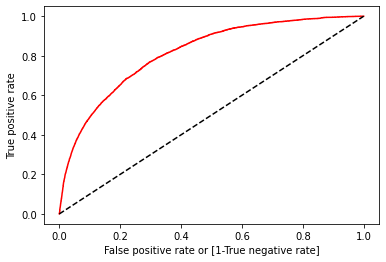

In [41]:
#ROC CURVE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y,classifier.predict_proba(x)[:,1])
auc = roc_auc_score(y,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red', label = 'logit model'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate or [1-True negative rate]')
plt.ylabel('True positive rate')

In [42]:
auc

0.5734694329116669